## shapemetrics: grid with multipolygons and rings


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math, random, time, os, sys, string

#geometry
import geopandas as gpd
from shapely.geometry import Polygon, Point, MultiPolygon
import mp_helper_tool_rodrigo

In [2]:
shp_path = '/Users/rodrigo/Documents/tfg/cities/data/created/shp/potential_footpint_8.shp'
shpfile = gpd.read_file(shp_path)
print(shpfile.crs)
shpfile['geometry'] = shpfile['geometry'].to_crs({'init': 'epsg:2062'})
print(shpfile.crs)
shpfile.head()

{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


,id,geometry
0,1,"MULTIPOLYGON (((369708.730 215213.050, 369833...."
1,2,"MULTIPOLYGON (((689548.002 234756.968, 689549...."
2,3,"MULTIPOLYGON (((810536.212 363776.414, 810540...."
3,4,"MULTIPOLYGON (((189637.627 880271.109, 189628...."
4,5,"MULTIPOLYGON (((227103.523 994003.991, 227095...."


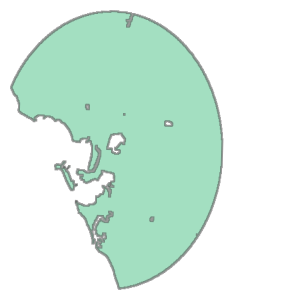

In [3]:
# tests

# mp from shapefile
mp_shp = shpfile['geometry'][0]
display(mp_shp)

# own mp
polygon_with_rings = Polygon([[0,0], [0,5], [4,5], [4,0]] ,[[[1,1], [1,2], [4,2], [2, 1]]])
polygon_without_rings = Polygon([[12,12], [12,19], [16,17], [16,12]])
mp_test = MultiPolygon([polygon_with_rings, polygon_without_rings])
#display(mp_test)

In [4]:
vertexLst, featPntLst = mp_helper_tool_rodrigo.ConvertToGridPnts(mp_shp) 

number of polygons: 8
number of rings in polygon 1 : 0
number of rings in polygon 2 : 0
number of rings in polygon 3 : 0
number of rings in polygon 4 : 0
number of rings in polygon 5 : 0
number of rings in polygon 6 : 0
number of rings in polygon 7 : 0
number of rings in polygon 8 : 6

points removed: 148


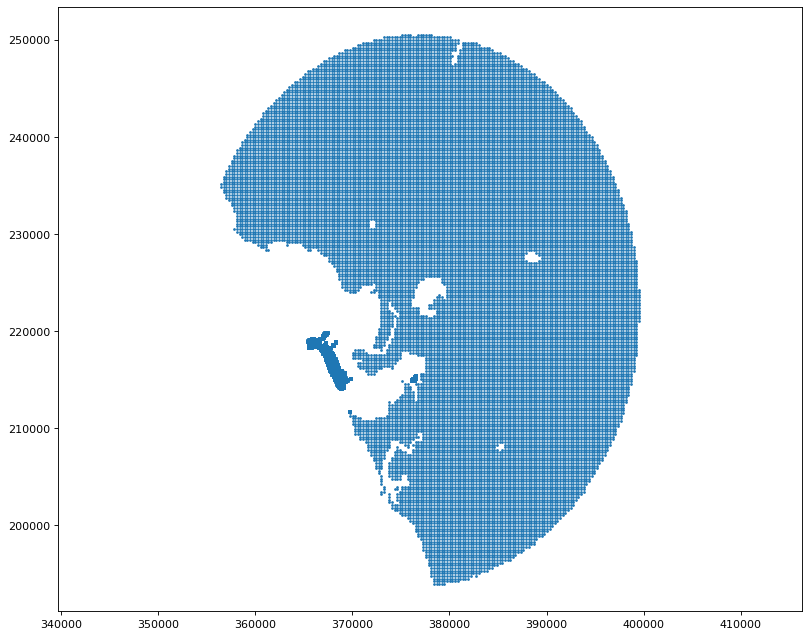

In [5]:
# plot all together

together = []
for i in range(len(featPntLst)):
    together +=  featPntLst[i]

xs = [x[0] for x in together]
ys = [x[1] for x in together]
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.set_aspect('equal', adjustable='datalim')
plt.scatter(xs, ys, s = 2)
plt.show()


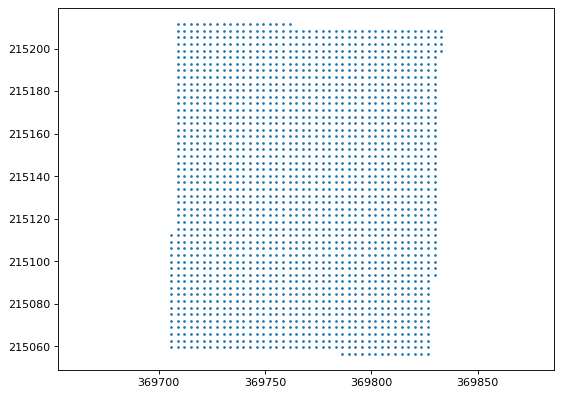

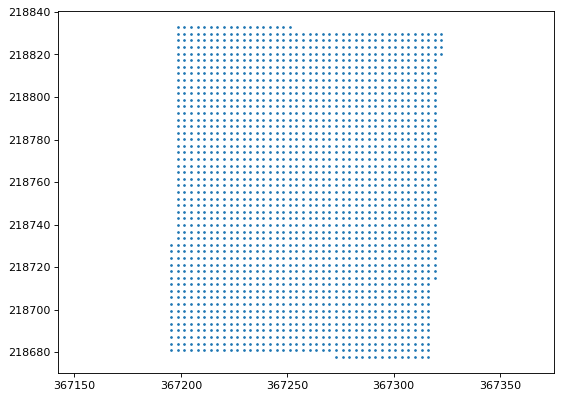

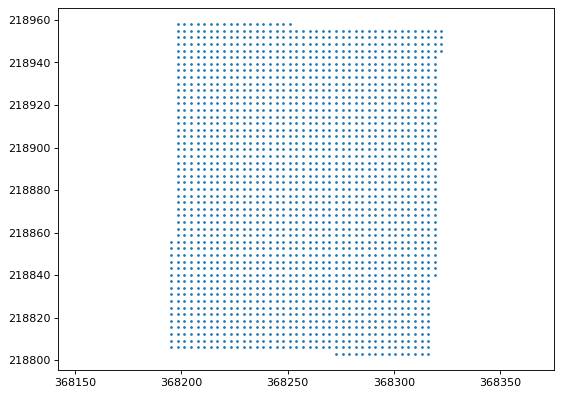

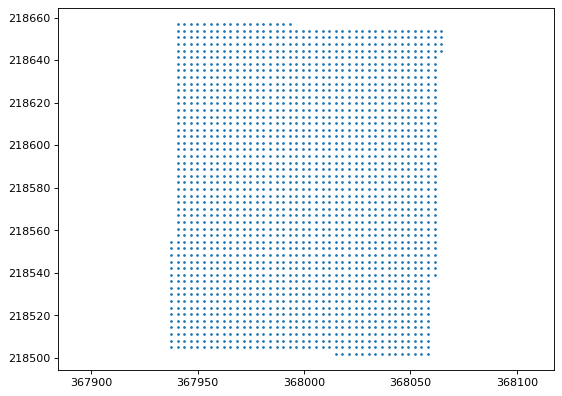

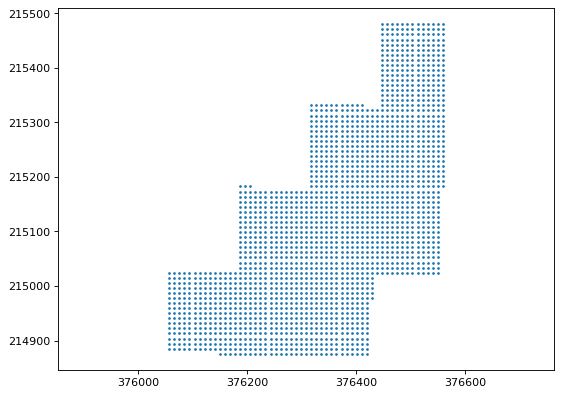

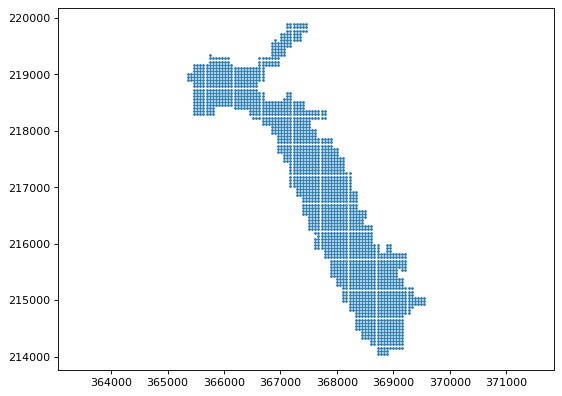

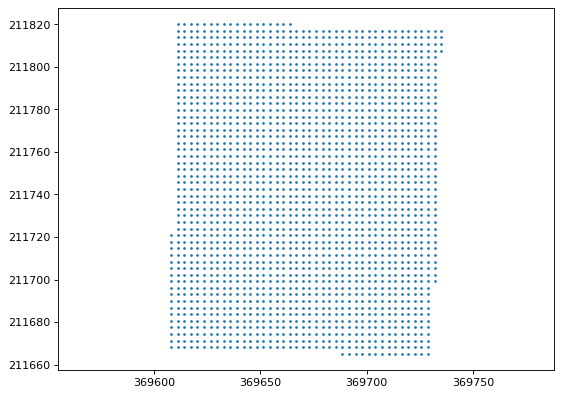

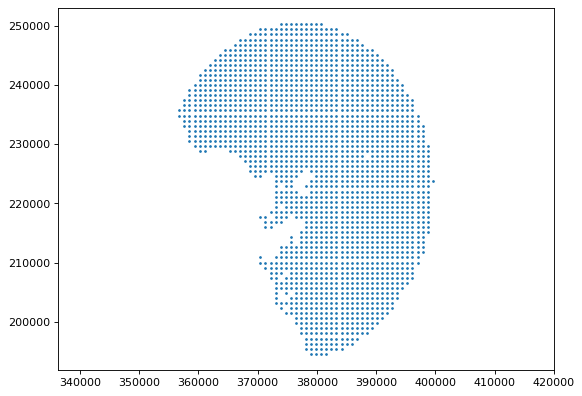

In [58]:
#plot one by one

for i in range(len(featPntLst)):

    xs = [x[0] for x in featPntLst[i]]
    ys = [x[1] for x in featPntLst[i]]
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='datalim')
    plt.scatter(xs, ys, s=2)
    plt.show()

## Dispersion index


In [15]:
start = time.time()
dispersion = mp_helper_tool_rodrigo.interpointDistance(featPntLst[7])
end = time.time()
print(end - start)

11.222655057907104


In [17]:
mp_shp.area
dispersion

21640.32297653542

In [16]:
A = mp_shp[7].area
r = (A / math.pi)**.5       # radius of equal area circle (circle with area equal to shape area)
circ_interD = r * .9054

# cohesion index is ratio of avg interpoint distance of circle to
# avg interpoint distance of shape...
CohesionIndex = circ_interD / dispersion
CohesionIndex

0.9028728276042884